# Bank Marketing Prediction

#### Read in the file and get basic information about the data, including numerical summaries.

- Describe the pdays column, make note of the mean, median and minimum values. Anything
fishy in the values?

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

Importing the data

In [2]:
data=pd.read_csv(r'F:\Data Science\Machine Learning\ass1\ML Project1_BMP\bank-marketing.csv')

In [3]:
print(data)

       age           job  salary   marital  education targeted default  \
0       58    management  100000   married   tertiary      yes      no   
1       44    technician   60000    single  secondary      yes      no   
2       33  entrepreneur  120000   married  secondary      yes      no   
3       47   blue-collar   20000   married    unknown       no      no   
4       33       unknown       0    single    unknown       no      no   
...    ...           ...     ...       ...        ...      ...     ...   
45206   51    technician   60000   married   tertiary      yes      no   
45207   71       retired   55000  divorced    primary      yes      no   
45208   72       retired   55000   married  secondary      yes      no   
45209   57   blue-collar   20000   married  secondary      yes      no   
45210   37  entrepreneur  120000   married  secondary      yes      no   

       balance housing loan    contact  day month  duration  campaign  pdays  \
0         2143     yes   no    

In [4]:
data['pdays'].describe()

count    45211.000000
mean        40.197828
std        100.128746
min         -1.000000
25%         -1.000000
50%         -1.000000
75%         -1.000000
max        871.000000
Name: pdays, dtype: float64

pdays: number of days that passed by after the client was last contacted from a previous campaign (numeric; 999 means client was not previously contacted)

We can see that 75% values of pdays are -1. So -1 has special meaning over here i.e. previous campaign was made to them or not. So in our case if we want to make decision on customer who did have campaign previously, then we must exclude all the cases of -1. So, by doing this we can get to customer who had previously campaign.

Describe the pdays column again, this time limiting yourself to the relevant values of pdays. How
different are the mean and the median values?

In [5]:
data1=data.copy()

In [6]:
data1.drop(data1[data1['pdays']<1].index,inplace=True)

In [7]:
data1

,age,job,salary,marital,education,targeted,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,response
24060,33,admin.,50000,married,tertiary,yes,no,882,no,no,telephone,21,oct,39,1,151,3,failure,no
24062,42,admin.,50000,single,secondary,yes,no,-247,yes,yes,telephone,21,oct,519,1,166,1,other,yes
24064,33,services,70000,married,secondary,yes,no,3444,yes,no,telephone,21,oct,144,1,91,4,failure,yes
24072,36,management,100000,married,tertiary,yes,no,2415,yes,no,telephone,22,oct,73,1,86,4,other,no
24077,36,management,100000,married,tertiary,yes,no,0,yes,no,telephone,23,oct,140,1,143,3,failure,yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45199,34,blue-collar,20000,single,secondary,yes,no,1475,yes,no,cellular,16,nov,1166,3,530,12,other,no
45201,53,management,100000,married,tertiary,yes,no,583,no,no,cellular,17,nov,226,1,184,4,success,yes
45204,73,retired,55000,married,secondary,yes,no,2850,no,no,cellular,17,nov,300,1,40,8,failure,yes
45208,72,retired,55000,married,secondary,yes,no,5715,no,no,cellular,17,nov,1127,5,184,3,success,yes


In [8]:
data1['pdays'].describe()

count    8257.000000
mean      224.577692
std       115.344035
min         1.000000
25%       133.000000
50%       194.000000
75%       327.000000
max       871.000000
Name: pdays, dtype: float64

Now, mean and median has changed significantly because  above we have removed the data from column pdays, where pdays value is -1 ie we have removed the customer that were not contacted previously for the campaign.

In [9]:
data1['pdays'].shape

(8257,)

In [10]:
data['pdays'].shape

(45211,)

Plot a horizontal bar graph with the median values of balance for each education level value.
Which group has the highest median?


Text(0.5, 0, 'Balance(median)')

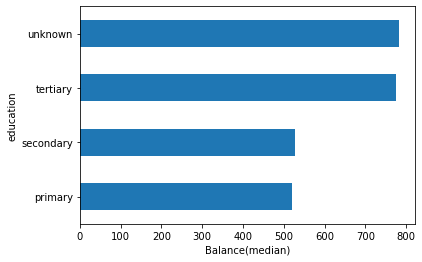

In [11]:
data1.groupby(['education'])['balance'].median().plot.barh()
plt.xlabel('Balance(median)')

Make a box plot for pdays. Do you see any outliers?


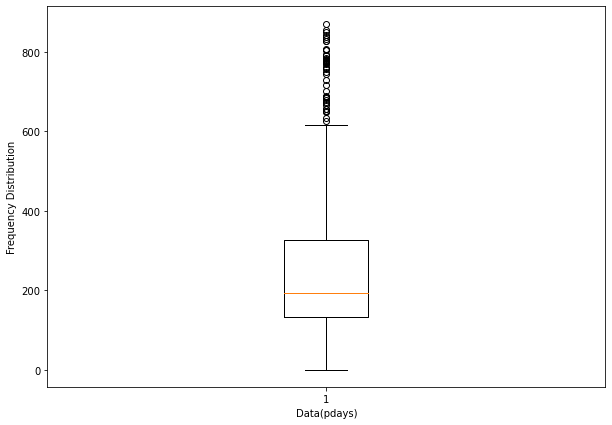

In [12]:
fig = plt.figure(figsize =(10, 7)) 
  
# Creating plot 
plt.boxplot(data1['pdays']) 
plt.ylabel('Frequency Distribution')
plt.xlabel('Data(pdays)')
  
# show plot 
plt.show() 

Yes, from the above box plot/Whisker plot we can see that there are outliers present in pdays.

The final goal is to make a predictive model to predict if the customer will respond positively to the
campaign or not. The target variable is “response”.
First, perform bi-variate analysis to identify the features that are directly associated with the target
variable. You can refer to the notebook we used for the EDA discussion.

- Convert the response variable to a convenient form
- Make suitable plots for associations with numerical  features and categorical features’

In [13]:
data1.response.value_counts()

no     6352
yes    1905
Name: response, dtype: int64

In [14]:
data1.response.replace(('yes','no'),(1,0),inplace=True)

In [15]:
data1.head()

,age,job,salary,marital,education,targeted,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,response
24060,33,admin.,50000,married,tertiary,yes,no,882,no,no,telephone,21,oct,39,1,151,3,failure,0
24062,42,admin.,50000,single,secondary,yes,no,-247,yes,yes,telephone,21,oct,519,1,166,1,other,1
24064,33,services,70000,married,secondary,yes,no,3444,yes,no,telephone,21,oct,144,1,91,4,failure,1
24072,36,management,100000,married,tertiary,yes,no,2415,yes,no,telephone,22,oct,73,1,86,4,other,0
24077,36,management,100000,married,tertiary,yes,no,0,yes,no,telephone,23,oct,140,1,143,3,failure,1


#A pairs plot allows us to see both distribution of single variables and relationships between two variables. 

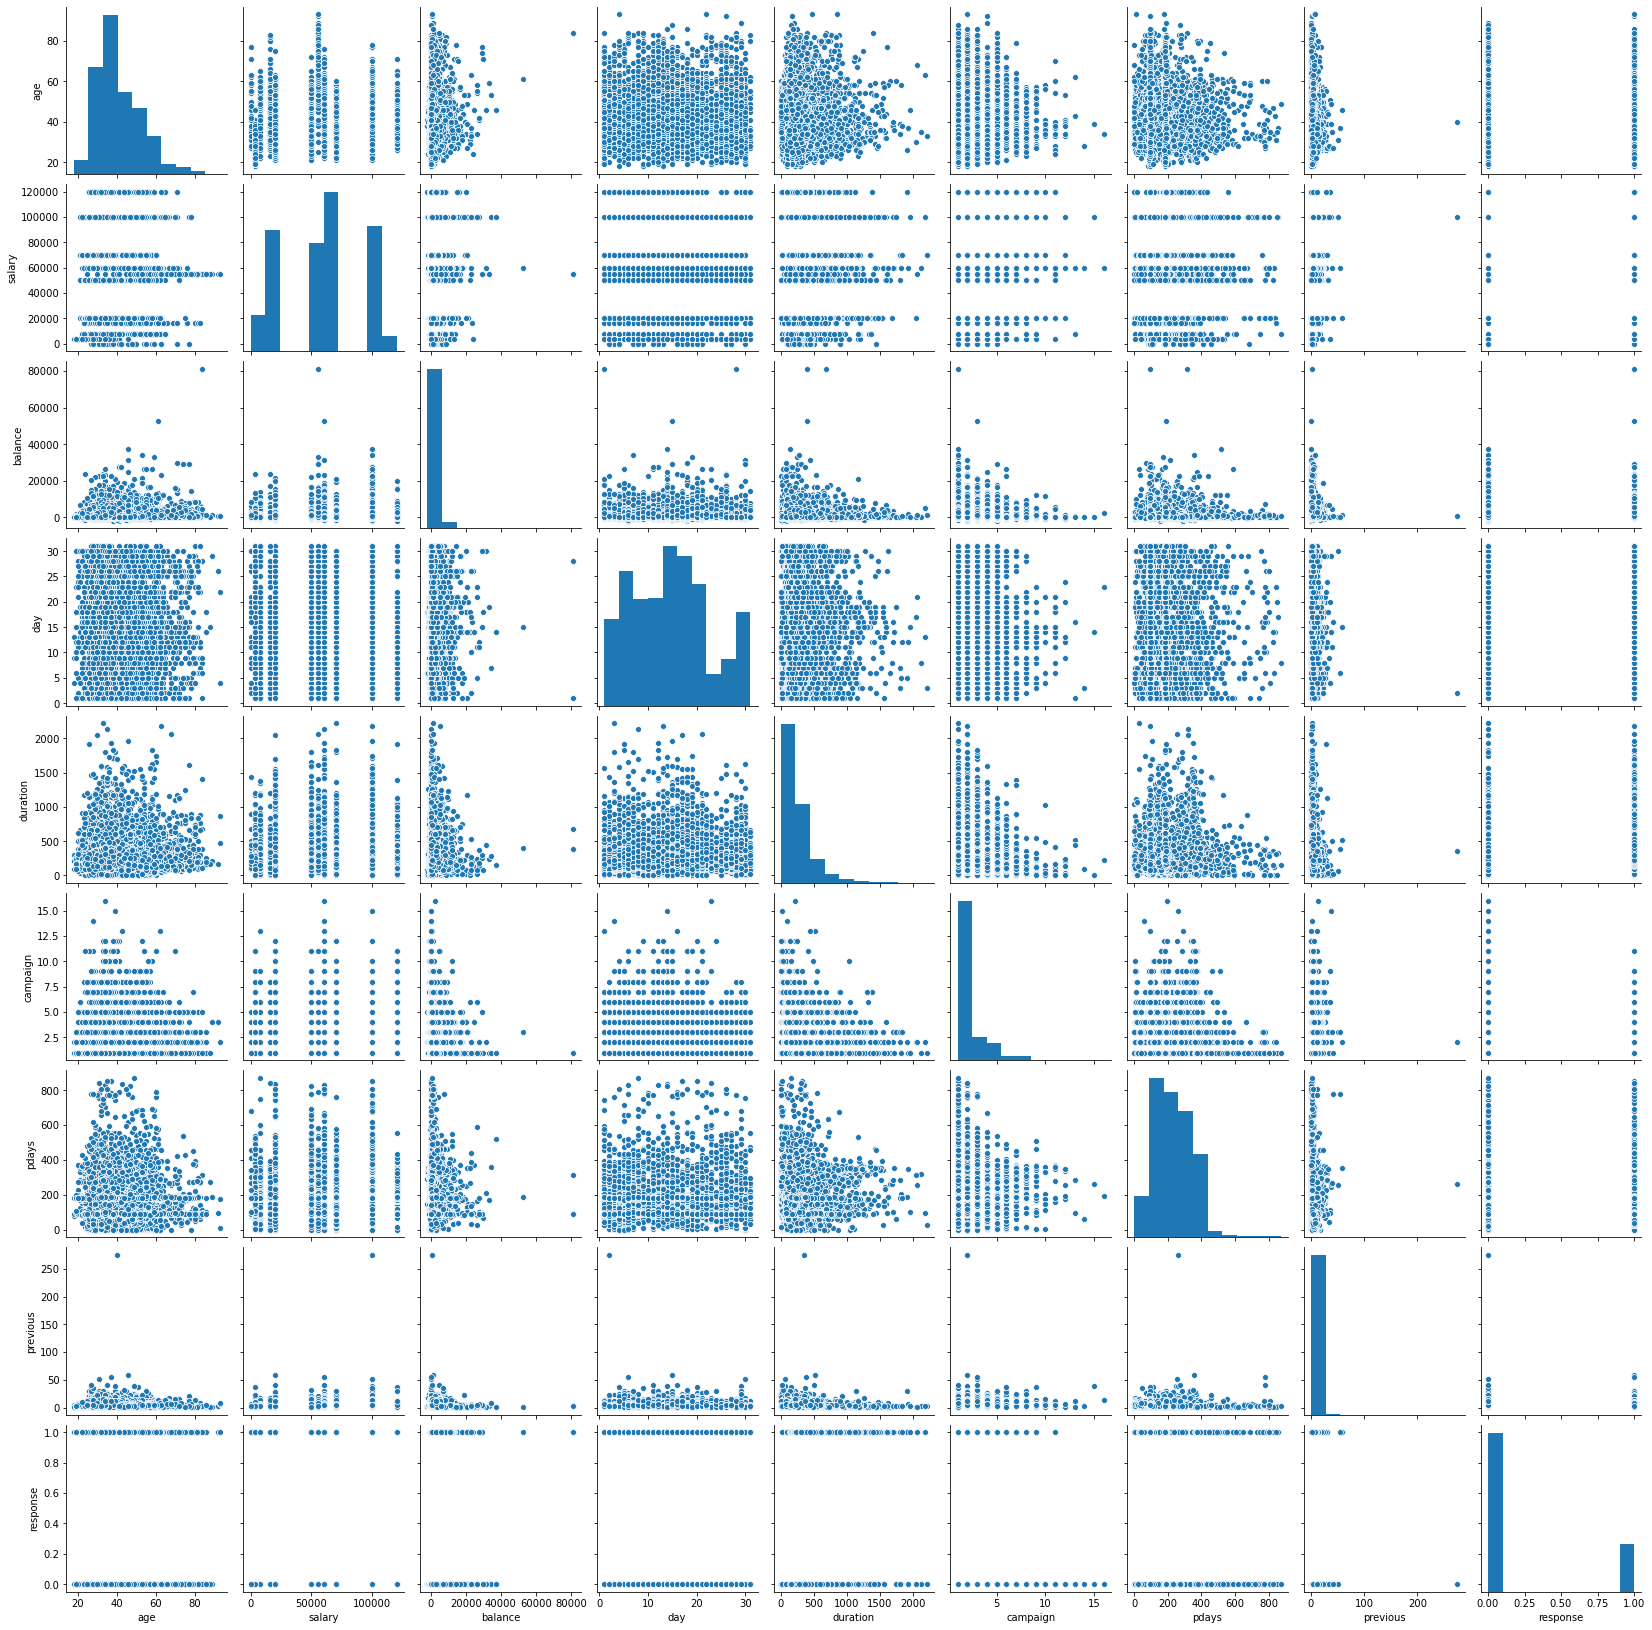

In [16]:
sns.pairplot(data=data1)

In [17]:
obj_col = []
num_col = []
for col in data1.columns:
    if data1[col].dtype=='O':
        obj_col.append(col)
    else:
        num_col.append(col)


In [18]:
print('object column:',obj_col)
print('Numerical column',num_col)

object column: ['job', 'marital', 'education', 'targeted', 'default', 'housing', 'loan', 'contact', 'month', 'poutcome']
Numerical column ['age', 'salary', 'balance', 'day', 'duration', 'campaign', 'pdays', 'previous', 'response']


Are the features about the previous campaign data useful?

Yes,the features about the previous campaign data useful

Before the predictive modeling part, make sure to perform –
- The necessary transformations for the categorical variables and the numeric variables
- Handle variables corresponding to the previous campaign
- Train test split


### Predictive modeling 

In [19]:
from sklearn import preprocessing
from sklearn.preprocessing import  LabelEncoder
encoded =LabelEncoder()

In [20]:
data2 = data1[obj_col].apply(LabelEncoder().fit_transform)

In [21]:
print(data2)

       job  marital  education  targeted  default  housing  loan  contact  \
24060    0        1          2         1        0        0     0        1   
24062    0        2          1         1        0        1     1        1   
24064    7        1          1         1        0        1     0        1   
24072    4        1          2         1        0        1     0        1   
24077    4        1          2         1        0        1     0        1   
...    ...      ...        ...       ...      ...      ...   ...      ...   
45199    1        2          1         1        0        1     0        0   
45201    4        1          2         1        0        0     0        0   
45204    5        1          1         1        0        0     0        0   
45208    5        1          1         1        0        0     0        0   
45210    2        1          1         1        0        0     0        0   

       month  poutcome  
24060     10         0  
24062     10         1  


In [22]:
data_prep=data2.join(data1[num_col])

In [23]:
data_prep

,job,marital,education,targeted,default,housing,loan,contact,month,poutcome,age,salary,balance,day,duration,campaign,pdays,previous,response
24060,0,1,2,1,0,0,0,1,10,0,33,50000,882,21,39,1,151,3,0
24062,0,2,1,1,0,1,1,1,10,1,42,50000,-247,21,519,1,166,1,1
24064,7,1,1,1,0,1,0,1,10,0,33,70000,3444,21,144,1,91,4,1
24072,4,1,2,1,0,1,0,1,10,1,36,100000,2415,22,73,1,86,4,0
24077,4,1,2,1,0,1,0,1,10,0,36,100000,0,23,140,1,143,3,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45199,1,2,1,1,0,1,0,0,9,1,34,20000,1475,16,1166,3,530,12,0
45201,4,1,2,1,0,0,0,0,9,2,53,100000,583,17,226,1,184,4,1
45204,5,1,1,1,0,0,0,0,9,0,73,55000,2850,17,300,1,40,8,1
45208,5,1,1,1,0,0,0,0,9,2,72,55000,5715,17,1127,5,184,3,1


In [24]:
data_prep.corr()
#to find correlation between variables and if both variables are positively increasing then the value is positive and versa.
# IF 0 no correlation between variables

,job,marital,education,targeted,default,housing,loan,contact,month,poutcome,age,salary,balance,day,duration,campaign,pdays,previous,response
job,1.000000,0.072746,0.159280,-0.091197,-0.021012,-0.132378,-0.033500,-0.006279,-0.002498,0.066642,-0.020606,0.115271,0.041975,0.013841,0.024449,-0.008764,-0.110505,-0.000266,0.081239
marital,0.072746,1.000000,0.121688,-0.255247,-0.005632,-0.056963,-0.055435,-0.031866,-0.024130,0.045015,-0.414972,-0.042212,-0.019767,0.016797,-0.009075,-0.008338,-0.011861,0.004536,0.049234
education,0.159280,0.121688,1.000000,-0.632513,-0.013682,-0.129804,-0.047718,-0.048456,-0.010829,0.082852,-0.119516,0.423157,0.074166,0.023542,-0.001142,-0.024343,-0.140155,0.000115,0.108098
targeted,-0.091197,-0.255247,-0.632513,1.000000,0.019593,0.087470,0.070420,0.020464,0.010187,-0.071356,0.140750,-0.228338,-0.052007,-0.026179,-0.014729,0.017948,0.075638,-0.001205,-0.091216
default,-0.021012,-0.005632,-0.013682,0.019593,1.000000,0.022644,0.052261,-0.019834,0.020123,-0.025566,-0.027825,0.000361,-0.045010,-0.001013,-0.002635,-0.002064,0.033760,0.012149,-0.028299
housing,-0.132378,-0.056963,-0.129804,0.087470,0.022644,1.000000,0.109815,-0.069869,0.014452,-0.284439,-0.179386,-0.035905,-0.109163,-0.066740,-0.072070,0.063071,0.335124,0.008934,-0.317501
loan,-0.033500,-0.055435,-0.047718,0.070420,0.052261,0.109815,1.000000,-0.020904,0.000524,-0.103154,-0.008330,0.013788,-0.085004,0.007550,-0.033874,0.007444,0.022454,0.016549,-0.115805
contact,-0.006279,-0.031866,-0.048456,0.020464,-0.019834,-0.069869,-0.020904,1.000000,0.047045,0.024590,0.166384,-0.035805,0.030317,-0.012330,-0.036360,0.063199,0.077235,0.043830,-0.014321
month,-0.002498,-0.024130,-0.010829,0.010187,0.020123,0.014452,0.000524,0.047045,1.000000,-0.019188,0.013909,0.019820,0.015723,-0.024264,-0.036446,0.023224,0.022529,0.013977,-0.009586
poutcome,0.066642,0.045015,0.082852,-0.071356,-0.025566,-0.284439,-0.103154,0.024590,-0.019188,1.000000,0.051987,0.013079,0.051464,0.017125,0.108473,-0.000502,-0.235119,0.041607,0.420519


In [25]:
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import f1_score
np.random.seed(42)

In [26]:
X = data_prep.drop("response", axis=1)
X.head()

,job,marital,education,targeted,default,housing,loan,contact,month,poutcome,age,salary,balance,day,duration,campaign,pdays,previous
24060,0,1,2,1,0,0,0,1,10,0,33,50000,882,21,39,1,151,3
24062,0,2,1,1,0,1,1,1,10,1,42,50000,-247,21,519,1,166,1
24064,7,1,1,1,0,1,0,1,10,0,33,70000,3444,21,144,1,91,4
24072,4,1,2,1,0,1,0,1,10,1,36,100000,2415,22,73,1,86,4
24077,4,1,2,1,0,1,0,1,10,0,36,100000,0,23,140,1,143,3


In [27]:
y= data_prep[['response']]
y.head()

,response
24060,0
24062,1
24064,1
24072,0
24077,1


In [37]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size = 0.2,random_state=42)

In [38]:
reg = LogisticRegression()

In [39]:
reg.fit(X_train,y_train)

C:\Users\Ashish Kushwaha\anaconda3\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
C:\Users\Ashish Kushwaha\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [40]:
val=cross_val_score(reg,X_train,y_train,cv=5)

C:\Users\Ashish Kushwaha\anaconda3\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
C:\Users\Ashish Kushwaha\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\Ashish Kushwaha\anaconda3\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), 

In [41]:
print(np.mean(val))

0.7775927327781983


In [42]:
y_pred=reg.predict(X_test)

In [43]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.80      0.96      0.87      1279
           1       0.58      0.20      0.30       373

    accuracy                           0.79      1652
   macro avg       0.69      0.58      0.59      1652
weighted avg       0.75      0.79      0.74      1652



In [44]:
print(confusion_matrix(y_test,y_pred))

[[1226   53]
 [ 299   74]]


In [45]:
f1_score(y_pred,y_test)
#F1 = 2 * (precision * recall) / (precision + recall)

0.296

Feature selection :RFE(Recursive Feature elimination)

In [46]:
from sklearn.feature_selection import RFE
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
rfe = RFE(reg, 5)
rfe.fit(X_train,y_train)

C:\Users\Ashish Kushwaha\anaconda3\lib\site-packages\sklearn\utils\validation.py:68: FutureWarning: Pass n_features_to_select=5 as keyword args. From version 0.25 passing these as positional arguments will result in an error
  warnings.warn("Pass {} as keyword args. From version 0.25 "
C:\Users\Ashish Kushwaha\anaconda3\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
C:\Users\Ashish Kushwaha\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/li

RFE(estimator=LogisticRegression(), n_features_to_select=5)

In [47]:
rfe.support_

array([False, False, False, False,  True,  True,  True,  True, False,
        True, False, False, False, False, False, False, False, False])

In [48]:
X_train.columns[rfe.support_]

Index(['default', 'housing', 'loan', 'contact', 'poutcome'], dtype='object')

In [49]:
cols = X_train.columns[rfe.support_]

In [50]:
reg.fit(X_train[cols],y_train)

C:\Users\Ashish Kushwaha\anaconda3\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


LogisticRegression()

In [51]:
y_pred2 = reg.predict(X_test[cols])

In [52]:
f1_score(y_pred2,y_test)

0.5043478260869565

In [53]:
confusion_matrix(y_pred2,y_test)

array([[1222,  228],
       [  57,  145]], dtype=int64)

USE STATSMODEL

In [54]:
import statsmodels.api as sm

In [55]:
X_train.head()

,job,marital,education,targeted,default,housing,loan,contact,month,poutcome,age,salary,balance,day,duration,campaign,pdays,previous
40829,0,2,1,1,0,1,0,0,1,2,40,50000,100,11,221,1,461,1
29715,9,1,1,1,0,0,1,0,3,0,45,60000,366,3,235,2,169,12
35015,9,1,1,1,0,1,0,0,8,0,32,60000,-360,6,131,2,344,2
41008,0,2,2,0,0,0,0,0,1,2,36,50000,994,13,185,2,105,3
40646,8,2,1,1,0,1,0,1,1,0,25,4000,41,5,100,2,93,2


In [56]:
X_train_sm = sm.add_constant(X_train[cols])

X_train_sm.head()

,const,default,housing,loan,contact,poutcome
40829,1.0,0,1,0,0,2
29715,1.0,0,0,1,0,0
35015,1.0,0,1,0,0,0
41008,1.0,0,0,0,0,2
40646,1.0,0,1,0,1,0


In [57]:
reg1 = sm.OLS(endog=y_train,exog= X_train_sm).fit()

In [58]:
reg1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:               response   R-squared:                       0.223
Model:                            OLS   Adj. R-squared:                  0.222
Method:                 Least Squares   F-statistic:                     378.4
Date:                Sat, 31 Oct 2020   Prob (F-statistic):               0.00
Time:                        01:43:36   Log-Likelihood:                -2842.3
No. Observations:                6605   AIC:                             5697.
Df Residuals:                    6599   BIC:                             5737.
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.2556      0.010     26.881      0.000       0.237       0.274
default       -0.0629      0.056     -1.127      0.260      -0.172       0.047
housing       -0.1904      0.010    -19.192      0.000      -0.210      -0.171
loan          -0.0730      0.014     -5.394      0.000      -0.099      -0.046
contact       -0.0618      0.014     -4.346      0.000      -0.090      -0.034
poutcome       0.1873      0.006     30.507      0.000       0.175       0.199
==============================================================================
Omnibus:                      750.000   Durbin-Watson:                   2.039
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             1028.279
Skew:                           0.954   Prob(JB):                    5.15e-224
Kurtosis:                       3.306   Cond. No.                         16.9
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [100]:
(-0.0461)<(-0.0019)

True

Variance Inflation Factors(VIF)

In [59]:
from statsmodels.stats .outliers_influence import variance_inflation_factor

1 = not correlated.
Between 1 and 5 = moderately correlated.
Greater than 5 = highly correlated.

In [60]:
vif=pd.DataFrame()

In [61]:
vif['features']=X_train.columns

In [62]:
vif['VIF'] = [variance_inflation_factor(X_train.values, i) for i in range(X_train.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)

In [63]:
print(vif)

     features    VIF
10        age  11.79
2   education   6.43
3    targeted   6.43
11     salary   5.38
16      pdays   5.21
1     marital   4.35
13        day   4.10
8       month   3.60
5     housing   3.14
15   campaign   2.87
0         job   2.85
14   duration   2.26
17   previous   1.91
9    poutcome   1.76
12    balance   1.30
6        loan   1.20
7     contact   1.15
4     default   1.02


Which features are the most important from your model?
Housing, loan, default, poutcome are important feature from logistic regression model perspective


### Predictive model 2: Random Forest

In [64]:
from sklearn.ensemble import RandomForestClassifier

In [65]:
classifier=RandomForestClassifier(n_estimators=1,max_features=5,max_depth=5,criterion='entropy',random_state=0)

In [66]:
classifier.fit(X_train,y_train)

<ipython-input-66-c8b679b88806>:1: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  classifier.fit(X_train,y_train)


RandomForestClassifier(criterion='entropy', max_depth=5, max_features=5,
                       n_estimators=1, random_state=0)

In [67]:
score=cross_val_score(classifier,X_train,y_train,cv=5)

C:\Users\Ashish Kushwaha\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\Ashish Kushwaha\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\Ashish Kushwaha\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\Ashish Kushwaha\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:531: Dat

In [68]:
print(np.mean(score))

0.8267978803936412


In [69]:
y_pred1 = classifier.predict(X_test)

In [70]:
print(classification_report(y_test,y_pred1))

              precision    recall  f1-score   support

           0       0.83      0.93      0.88      1279
           1       0.58      0.35      0.44       373

    accuracy                           0.80      1652
   macro avg       0.71      0.64      0.66      1652
weighted avg       0.77      0.80      0.78      1652



In [71]:
confusion_matrix(y_test,y_pred1)

array([[1185,   94],
       [ 243,  130]], dtype=int64)

What is the precision, recall, accuracy of your model?
- Using the feature importance values from the Random Forest module, identify the most
important features for the model

In [76]:
from sklearn.feature_selection import RFE
from sklearn.preprocessing import MinMaxScaler

In [77]:
scaler=MinMaxScaler()

In [80]:
import warnings
warnings.filterwarnings("ignore")

In [86]:
rfe1 = RFE(classifier, 5)
rfe1.fit(X_train,y_train)

RFE(estimator=RandomForestClassifier(criterion='entropy', max_depth=5,
                                     max_features=5, n_estimators=1,
                                     random_state=0),
    n_features_to_select=5)

In [88]:
rfe1.support_

array([False, False, False, False, False,  True, False, False, False,
        True, False, False,  True, False,  True, False,  True, False])

In [87]:
X_train.columns[rfe1.support_]

Index(['housing', 'poutcome', 'balance', 'duration', 'pdays'], dtype='object')

In [89]:
classifier.fit(X_train[cols],y_train)

RandomForestClassifier(criterion='entropy', max_depth=5, max_features=5,
                       n_estimators=1, random_state=0)

In [90]:
y_pred3 = classifier.predict(X_test[cols])

In [91]:
f1_score(y_pred3,y_test)

0.5848484848484848

In [92]:
confusion_matrix(y_pred3,y_test)

array([[1185,  180],
       [  94,  193]], dtype=int64)

In [93]:
print(classification_report(y_test,y_pred3))

              precision    recall  f1-score   support

           0       0.87      0.93      0.90      1279
           1       0.67      0.52      0.58       373

    accuracy                           0.83      1652
   macro avg       0.77      0.72      0.74      1652
weighted avg       0.82      0.83      0.83      1652



In [94]:
val1=cross_val_score(classifier,X_train,y_train,cv=5)

In [95]:
print(np.mean(val1))

0.8267978803936412


Compare the performance of the Random Forest and the logistic model –

Evaluate both models on the test set-Done Above

- Which metric did you choose and why?

 various ways to check the performance of our machine learning :
Confusion matrix
Accuracy
Precision
Recall
Specificity
F1 score
Precision-Recall

- Which model has better performance on the test set?

Random forest has the better performance.